# Regression Analysis to Predict Energy Output of a Combined Cycle Power Plant (CCPP) from its Operating Conditions

### __Description of Dataset:__

The dataset is from the UI ML repository [1]. It contains 9568 data points collected from a Combined Cycle Power Plant operating at full capacity from 2006-2011. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V). These features will be used to predict the net hourly electrical energy output (EP) of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

The data provided from the source has been shuffled five times (with 2-fold CV carried out for each shuffling) to allow 5x2 fold statistical tests to be carried out in the original baseline study.

### __Objective:__
To build __Regression Model__ predicting Power Output (EP) __(1 dependent var)__ from Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) __(4 independent vars)__.

### __Feature Information:__
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

## 1. Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

ranstate = 4321
path = 'D:\\Programing\\GithubDataset\\UIrepo\\CPP\\'
file1 = path + 'cppyr1.csv' 
file2 = path + 'cppyr2.csv' 
file3 = path + 'cppyr3.csv' 
file4 = path + 'cppyr4.csv' 
file5 = path + 'cppyr5.csv' 
collections = [pd.read_csv(file1), pd.read_csv(file2), pd.read_csv(file3), pd.read_csv(file4), pd.read_csv(file5)]
df = pd.DataFrame()
for elem in collections:
    df = pd.concat([df,elem], axis=0, ignore_index=True)

print('number of NaN+Null: ', (df.isnull().sum() + df.isna().sum()) )
df.sample(5)

number of NaN+Null:  AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


,AT,V,AP,RH,PE
9677,34.53,73.03,1013.53,36.74,437.03
13360,24.41,58.59,1012.62,64.52,442.64
31438,19.94,44.63,1004.73,78.48,455.58
35088,11.01,40.05,1015.46,89.22,474.20
13320,14.65,35.40,1016.16,60.26,469.61


In [2]:
df.describe(include='all')

,AT,V,AP,RH,PE
count,47840.000000,47840.000000,47840.000000,47840.000000,47840.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452162,12.707362,5.938535,14.599658,17.066281
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## 2. Normalize Dataset Then Split to Training and Test Datasets

In [3]:
# normalize
X = df.copy()

for i in range(len(X.columns)):
    X[X.columns[i]] = minmax_scale(X[X.columns[i]])
X.sample(10)

,AT,V,AP,RH,PE
7719,0.665722,0.643060,0.406335,0.506032,0.222119
20573,0.476487,0.441281,0.428607,0.959383,0.395762
5057,0.183853,0.316192,0.671368,0.771448,0.845166
15008,0.335977,0.286833,0.609255,0.509115,0.578940
25247,0.318130,0.272776,0.570898,0.761528,0.705033
11051,0.329178,0.326157,0.577085,0.636059,0.729801
3784,0.333994,0.281851,0.569908,0.797453,0.624636
20410,0.631161,0.686477,0.611235,0.341287,0.300132
27862,0.289802,0.264591,0.623113,0.746917,0.694570
2034,0.307365,0.266726,0.457313,0.766890,0.700000


In [4]:
# create feature matrix
y = X.PE
X = X.drop(['PE'], axis=1)

In [5]:
# split training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=ranstate, shuffle=True)

## 3. Build Regression Models
### 3.1. Check Feature Correlations

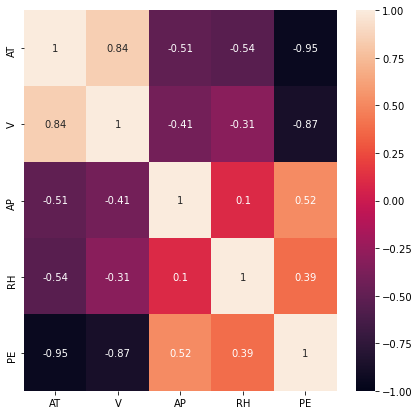

In [6]:
# Check correlation features of variables
corr_matrix = df.corr() 

plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

### 3.2. Import Regression Models and Fit Training Dataset

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [8]:
# Instantiate the regressors and make a list
regressors = [LinearRegression(), 
               SGDRegressor(), 
               RandomForestRegressor(random_state=ranstate), 
               XGBRegressor(random_state=ranstate, n_jobs=-1)]

In [9]:
lm = regressors[0].fit(X_train, y_train)
y_predLM = lm.predict(X_test)
print('R^2 Linear Regressor: ', r2_score(y_test, y_predLM) )
print('MSE (mean sq err) Linear Regressor: ',mean_squared_error(y_test, y_predLM) )

R^2 Linear Regressor:  0.927017428272502
MSE (mean sq err) Linear Regressor:  0.003702124207417444


In [10]:
sgdm = regressors[1].fit(X_train, y_train)
y_predSGD = sgdm.predict(X_test)
print('R^2 Stoc Grad Desc Regressor: ', r2_score(y_test, y_predSGD) )
print('MSE (mean sq err) Stoc Grad Desc Regressor: ',mean_squared_error(y_test, y_predSGD) )

R^2 Stoc Grad Desc Regressor:  0.8956212275730467
MSE (mean sq err) Stoc Grad Desc Regressor:  0.005294732303832282


In [11]:
rfm = regressors[2].fit(X_train, y_train)
y_predRF = rfm.predict(X_test)
print('R^2 Random Forest Regressor: ', r2_score(y_test, y_predRF) )
print('MSE (mean sq err) Random Forest Regressor: ', mean_squared_error(y_test, y_predRF) )

R^2 Random Forest Regressor:  0.9988118887285498
MSE (mean sq err) Random Forest Regressor:  6.026829960945621e-05


In [12]:
xgbm = regressors[3].fit(X_train, y_train) 
y_predXGB = xgbm.predict(X_test)
print('R^2 XGBoost Regressor: ', r2_score(y_test, y_predXGB) )
print('MSE (mean sq err) XGBoost Regressor: ', mean_squared_error(y_test, y_predXGB) )

R^2 XGBoost Regressor:  0.983922907536622
MSE (mean sq err) XGBoost Regressor:  0.0008155288555162662


# References:
1. https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
2. https://en.wikipedia.org/wiki/Combined_cycle_power_plant